# Example usage of procedural generator

In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt

from cilium import randomize_cilium

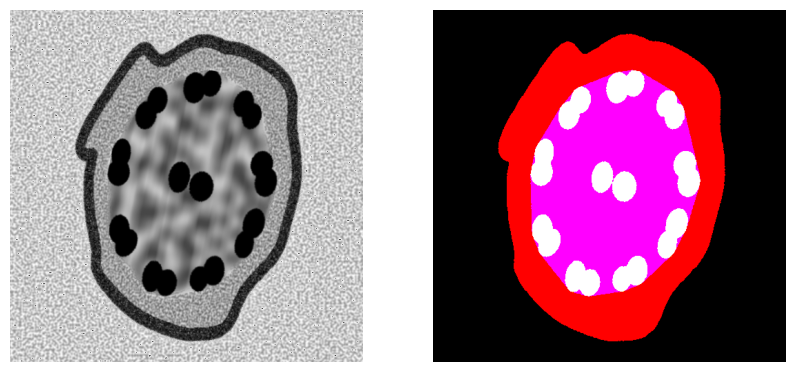

In [2]:
settings = {
    # Possible types: normal | CCD | transposition | single_tubule | disarranged (currently just experimental)
    "type": "normal",  # normal, CCD, transposition, single_tubule
    # Variation of the specific defect
    # CCD - no_central_pair | single_tubule | multiple"
    # transposition - with_space | without_space
    # disarranged - partial 
    "variation": "single_tubule",  
    "transposition": {  # additional settings for transposition defect
        "transposition_outer_pair_radius_range": [110, 160],
    },
    "disarranged": {  # additional settings for experimental disarranged defect
        "movement_ratio_range": [15, 40],  # will be divided by 100
        "angle_difference_range": [15, 165],
    },
    "single_tubule": {  # additional settings for single tubule defect
        "max_tubules": 3,  # maximum number of single tubules from "outer pairs"
    },
    "fill_tubules": "yes",  # yes, no, partial
    "canvas_shape": 512,
    "add_texture": True,
    "outer_pair_radius_range": [125, 140],
    "outer_pairs_number": 9,
    "final_blur_kernel_shape": [9, 9],
    "membrane_color_range": [60, 150],
    "membrane_thickness_range": [7, 20],
    "central_noise": {
        "resolution_value": 16,  # canvas_shape must be divisible by resolution_value
        "target_std_range": [20, 30],
        "target_mean_range": [100, 200],
        "mask_approach": "HULL",  # HULL, SHAPE
        "texture_outside": False,
        "mask_blur_kernel_shape": [31, 31],
    },
    "inside_noise": {
        "resolution_value": 128,  # canvas_shape must be divisible by resolution_value
        "target_std_range": [15, 30],
        "target_mean_range": [160, 220],
        "mask_approach": "SHAPE",  # HULL, SHAPE
        "texture_outside": False,
        "mask_blur_kernel_shape": [31, 31],
    },
    "outside_noise": {
        "resolution_value": 128,  # canvas_shape must be divisible by resolution_value
        "target_std_range": [15, 30],
        "target_mean_range": [190, 235],
        "mask_approach": "MASK",  # HULL, SHAPE, MASK
        "texture_outside": True,
        "mask_blur_kernel_shape": [31, 31],
    },
    "central_pair": {
        "canvas_shape": 100,
        "first_start_width_range": [21, 36],
        "first_start_height_range": [40, 61],
        "axes_length_range": [14, 18],
        "tubule_angle_range": [-15, 15],
        "thickness_range": [9, 11],
        "tubule_gap_range": [9, 20],
        "rotation_angle_range": [0, 180],
        "color": 0,
        "defect": None,
    },
    "outer_pair": {
        "canvas_shape": 100,
        "first_start_width_range": [25, 36],
        "first_start_height_range": [40, 61],
        "axes_length_range": [12, 17],
        "tubule_angle_range": [-15, 15],
        "thickness_range": [9, 11],
        "second_start_height_shift": [-5, 5],
        "color": 0
    },
    "final_randomization": {
        "unequal_resize_range": [70, 100],
        "rotation_range": [0, 180],
        "equal_resize_range": [80, 100],
        "close_fit_probability": 10,
        "close_fit_crop_ratio": [3, 10],
        "multiple_cilia": True,
        "multiple_cilia_probability": 35,
        "no_additional_cilia": 2,
        "multiple_cilia_radius": 256,
        "multiple_cilia_radius_increment": 30
    }
}

settings_input = deepcopy(settings)

cilium, segmentation_mask = randomize_cilium(settings_input)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cilium, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask)
plt.axis('off')

plt.show()